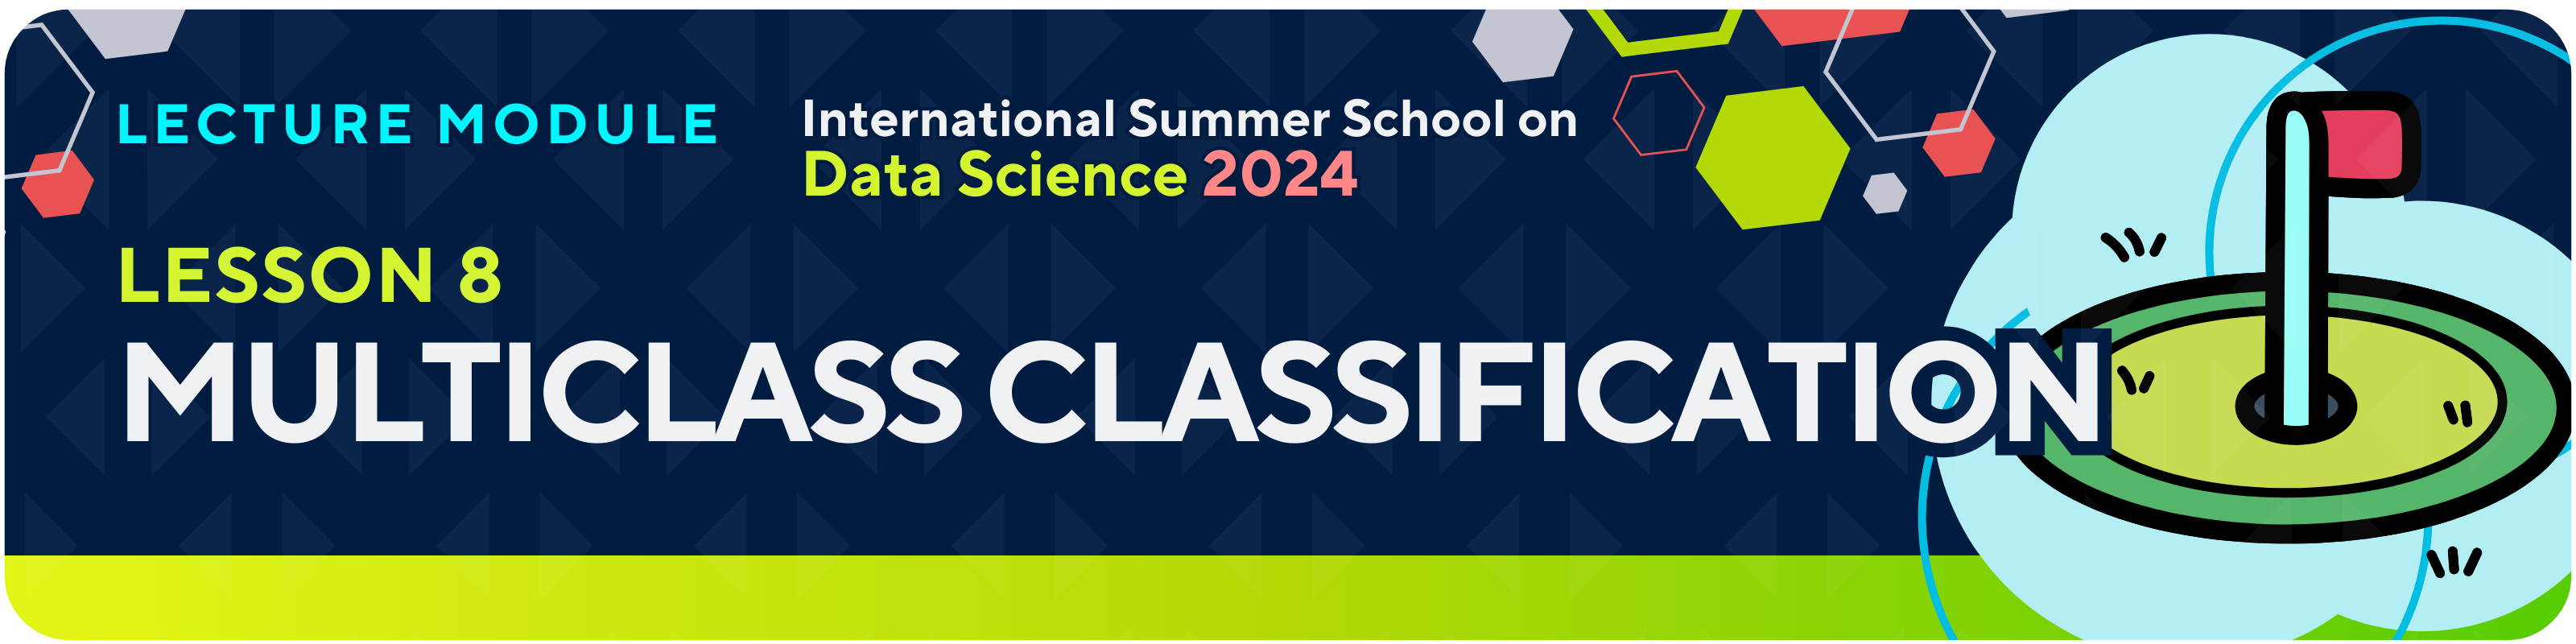

<div class='markdown-google-sans'>

## **08.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Prediction Probabilities**
</div>

<img src="https://i.imgur.com/mzCPaG8.png" width=800 />

<img src="https://i.imgur.com/rFbLOAT.png" width=800 />

<div class='markdown-google-sans'>

### **<font color=#819A00> Calculating Probabilities**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=800 />


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# REORDER THE DATAFRAME
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play']]

# Set feature matrix X and target vector y
X, y_clf = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Scale the numerical columns in the training and testing sets
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns

X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(pd.concat([X_train, y_clf_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play
0       1         0     0         1.80      0.50     0     0
1       1         0     0         1.02      1.02     1     0
2       0         1     0         1.49     -0.24     0     1
3       0         0     1        -0.56      1.66     0     1
4       0         0     1        -0.88     -0.03     0     1
5       0         0     1        -1.35     -1.08     1     0
6       0         1     0        -1.51     -1.61     1     1
7       1         0     0        -0.25      1.55     0     0
8       1         0     0        -0.72     -1.08     0     1
9       0         0     1         0.23     -0.03     0     1
10      1         0     0         0.23     -1.08     1     1
11      0         1     0        -0.25      1.02     1     1
12      0         1     0         1.17     -0.56     0     1
13      0         0     1        -0.41     -0.03     1     0 

    sunny  overcast  rain  Temperature  Humidity  Wind  Play
14      1         0   

<div class='markdown-google-sans'>

#### **k Nearest Neighbors**
</div>
<img src="https://i.imgur.com/VT5Xuhf.png" width=800 />


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_clf_train)

y_knn_pred = knn_clf.predict(X_test)
y_knn_prob = knn_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_knn_prob.round(2), 'Prediction': y_knn_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.00           0
15         0.67           1
16         0.67           1
17         0.67           1
18         0.00           0
19         0.67           1
20         0.67           1
21         1.00           1
22         1.00           1
23         1.00           1
24         1.00           1
25         0.67           1
26         0.67           1
27         0.67           1


<div class='markdown-google-sans'>

#### **Naive Bayes**
</div>
<img src="https://i.imgur.com/Fcpc39M.png" width=800 />


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_clf_train)
y_nb_pred = nb_clf.predict(X_test)
y_nb_prob = nb_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_nb_prob.round(2), 'Prediction': y_nb_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.16           0
15         0.89           1
16         0.55           1
17         0.41           0
18         0.31           0
19         0.32           0
20         0.78           1
21         0.53           1
22         0.41           0
23         0.97           1
24         0.62           1
25         0.78           1
26         0.80           1
27         0.97           1


<div class='markdown-google-sans'>

#### **Decision Tree**
</div>
<img src="https://i.imgur.com/GRIHXMA.png" width=800 />


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_clf_train)
y_dt_pred = dt_clf.predict(X_test)
y_dt_prob = dt_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_dt_prob.round(2), 'Prediction': y_dt_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.00           0
15         1.00           1
16         1.00           1
17         0.00           0
18         0.00           0
19         1.00           1
20         1.00           1
21         0.00           0
22         0.00           0
23         1.00           1
24         0.00           0
25         1.00           1
26         0.00           0
27         1.00           1


<div class='markdown-google-sans'>

#### **Logistic Regression**
</div>
<img src="https://i.imgur.com/OVZukOz.png" width=800 />


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_clf_train)
y_lr_pred = lr_clf.predict(X_test)
y_lr_prob = lr_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_lr_prob.round(2), 'Prediction': y_lr_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.31           0
15         0.77           1
16         0.62           1
17         0.48           0
18         0.42           0
19         0.47           0
20         0.63           1
21         0.61           1
22         0.52           1
23         0.90           1
24         0.78           1
25         0.55           1
26         0.82           1
27         0.83           1


<div class='markdown-google-sans'>

#### **SVM**
</div>
<img src="https://i.imgur.com/eIAyhet.png" width=800 />


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42) # Without probability=True, cannot access probability
svm_clf.fit(X_train, y_clf_train)
y_svm_pred = svm_clf.predict(X_test)
y_svm_prob = svm_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_svm_prob.round(2), 'Prediction': y_svm_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.16           0
15         0.72           1
16         0.71           1
17         0.62           1
18         0.14           0
19         0.66           1
20         0.57           1
21         0.75           1
22         0.64           1
23         0.84           1
24         0.74           1
25         0.55           1
26         0.64           1
27         0.74           1


<div class='markdown-google-sans'>

#### **Voting**
</div>
<img src="https://i.imgur.com/cbRHHxL.png" width=800 />


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define a list of (name, estimator) pairs
estimators = [('lr', LogisticRegression()),
              ('dt', DecisionTreeClassifier()),
              ('knn', KNeighborsClassifier(n_neighbors=3))]

voting_clf = VotingClassifier(estimators, voting='soft')
voting_clf.fit(X_train, y_clf_train)
y_voting_pred = voting_clf.predict(X_test)
y_voting_prob = voting_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_voting_prob.round(2), 'Prediction': y_voting_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.10           0
15         0.81           1
16         0.76           1
17         0.38           0
18         0.14           0
19         0.71           1
20         0.76           1
21         0.54           1
22         0.51           1
23         0.97           1
24         0.59           1
25         0.74           1
26         0.50           0
27         0.83           1


<div class='markdown-google-sans'>

#### **Bagging**
</div>
<img src="https://i.imgur.com/aUYPhPa.png" width=800 />


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_clf_train)
y_bagging_pred = bagging_clf.predict(X_test)
y_bagging_prob = bagging_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_bagging_prob.round(2), 'Prediction': y_bagging_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.23           0
15         0.60           1
16         0.77           1
17         0.73           1
18         0.23           0
19         0.67           1
20         0.77           1
21         0.90           1
22         0.90           1
23         1.00           1
24         1.00           1
25         0.40           0
26         0.53           1
27         0.80           1


<div class='markdown-google-sans'>

#### **AdaBoost**
</div>
<img src="https://i.imgur.com/sk7JOEK.png" width=800 />


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_clf_train)
y_ada_pred = ada_clf.predict(X_test)
y_ada_prob = ada_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_ada_prob.round(2), 'Prediction': y_ada_pred}, index=X_test.index)
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Probability  Prediction
14         0.19           0
15         0.96           1
16         0.55           1
17         0.43           0
18         0.28           0
19         0.43           0
20         0.83           1
21         0.26           0
22         0.43           0
23         0.99           1
24         0.55           1
25         0.83           1
26         0.39           0
27         0.96           1


<div class='markdown-google-sans'>

#### **Stacking**
</div>
<img src="https://i.imgur.com/kcAB1BU.png" width=800 />


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define a list of (name, estimator) pairs
estimators = [('knn', KNeighborsClassifier(n_neighbors=3)),
              ('dt', DecisionTreeClassifier(random_state=42)),
              ('svm', SVC(probability=True, random_state=42))]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_clf_train)
y_stacking_pred = stacking_clf.predict(X_test)
y_stacking_prob = stacking_clf.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({'Probability': y_stacking_prob.round(2), 'Prediction': y_stacking_pred}, index=X_test.index)
print(results_df)

    Probability  Prediction
14         0.62           1
15         0.65           1
16         0.65           1
17         0.63           1
18         0.62           1
19         0.65           1
20         0.65           1
21         0.63           1
22         0.63           1
23         0.66           1
24         0.63           1
25         0.65           1
26         0.63           1
27         0.65           1


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Prediction Probability Summarized**
</div>

In [ ]:
# IMPORTING DATASET #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import VotingClassifier
from sklearn.tree         import DecisionTreeClassifier

from sklearn.metrics      import accuracy_score

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SPLIT THE DATA into training and testing sets
X, y_clf = df.drop(columns='Play'), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE THE NUMERICAL COLUMNS in the training and testing sets
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# TRAIN THE MODEL
model = VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')
model.fit(X_train, y_clf_train)

# TEST THE MODEL
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

---
---

<div class='markdown-google-sans'>

## **08.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Direct Multiclass Classifiers**
</div>
<img src="https://i.imgur.com/7AJx0gH.png" width=800 />

<img src="https://i.imgur.com/9MbTdkH.png" width=800 />


<img src="https://i.imgur.com/3fY5ifJ.png" width=800 />


<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/v4EeoaL.png" width=800 />


<img src="https://i.imgur.com/QZeFQbp.png" width=800 />


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose       import ColumnTransformer
from sklearn.metrics       import accuracy_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Display the transformed data with column names
columns = ['overcast', 'rain', 'sunny', 'No Wind', 'Windy',  'Temperature', 'Humidity']
print(pd.concat([pd.DataFrame(X_train, columns=columns), y_train], axis=1), '\n')
print(pd.concat([pd.DataFrame(X_test, columns=columns), y_test.reset_index(drop=True)], axis=1))

    overcast  rain  sunny  No Wind  Windy  Temperature  Humidity  Activity
0       0.00  0.00   1.00     0.00   1.00        -1.71      1.04         2
1       0.00  0.00   1.00     0.00   1.00         1.23      1.72         2
2       0.00  1.00   0.00     0.00   1.00        -0.28     -0.40         1
3       0.00  1.00   0.00     0.00   1.00        -0.67     -1.24         0
4       0.00  0.00   1.00     0.00   1.00         0.99     -0.82         2
5       0.00  0.00   1.00     0.00   1.00        -1.47      1.29         2
6       0.00  0.00   1.00     0.00   1.00         1.31      0.53         2
7       0.00  1.00   0.00     0.00   1.00        -1.47     -0.91         0
8       0.00  0.00   1.00     0.00   1.00         0.67     -0.82         2
9       1.00  0.00   0.00     0.00   1.00         0.60     -0.31         1
10      1.00  0.00   0.00     1.00   0.00        -0.67     -1.33         0
11      0.00  1.00   0.00     1.00   0.00        -0.99      1.38         0
12      1.00  0.00   0.00

<div class='markdown-google-sans'>

### **<font color=#819A00> K Nearest Neighbor**
</div>
<img src="https://i.imgur.com/eL74FnD.png" width=800 />


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

y_knn_pred = knn_clf.predict(X_test)
y_knn_score = accuracy_score(y_knn_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_knn_pred}")
print(f"Accuracy  : {y_knn_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [0 0 1 2 2 2 2 2 2 0 0 0 2 2 2 0 2 0 0 1 0 0 2 1 2 0 2 2 0 2]
Accuracy  : 0.7


<div class='markdown-google-sans'>

### **<font color=#819A00> Naive Bayes**
</div>
<img src="https://i.imgur.com/tQdMUM3.png" width=800 />


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

y_nb_pred = nb_clf.predict(X_test)
y_nb_score = accuracy_score(y_nb_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_nb_pred}")
print(f"Accuracy  : {y_nb_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 1 0 1 0 2 2 0 0 0 1 2 0 2]
Accuracy  : 0.7333333333333333


<div class='markdown-google-sans'>

### **<font color=#819A00> Decision Tree**
</div>
<img src="https://i.imgur.com/yB2uy8u.png" width=800 />

<img src="https://i.imgur.com/sE3vB7M.png" width=800 />


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_dt_pred = dt_clf.predict(X_test)
y_dt_score = accuracy_score(y_dt_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_dt_pred}")
print(f"Accuracy  : {y_dt_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [2 1 1 0 0 2 2 2 1 0 0 0 2 2 1 1 2 0 0 1 1 1 1 2 0 2 2 2 1 1]
Accuracy  : 0.6666666666666666


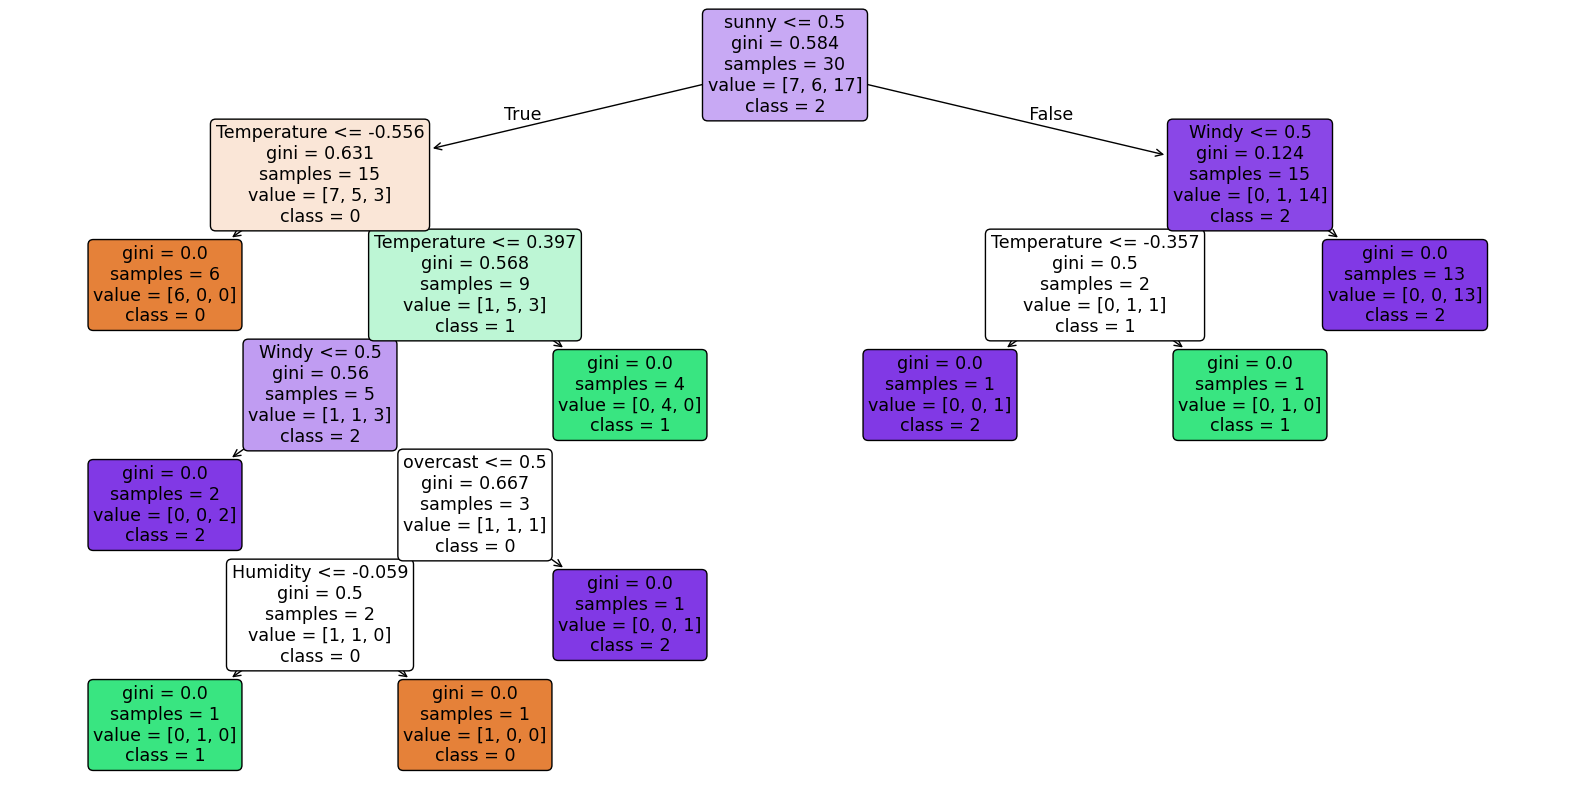

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))  # Set the size of the plot
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['0', '1', '2'],  # Replace with your class names
          feature_names=columns)  # Replace with your feature names
plt.show()

<div class='markdown-google-sans'>

### **<font color=#819A00> Bagging**
</div>
<img src="https://i.imgur.com/3yOtD7j.png" width=800 />


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                                n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

y_bagging_pred = bagging_clf.predict(X_test)
y_bagging_score = accuracy_score(y_bagging_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_bagging_pred}")
print(f"Accuracy  : {y_bagging_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [0 2 1 2 2 2 2 2 2 0 0 0 2 2 2 1 2 0 0 1 0 2 2 0 2 1 1 2 2 2]
Accuracy  : 0.6


<div class='markdown-google-sans'>

### **<font color=#819A00> Voting**
</div>
<img src="https://i.imgur.com/3qx43hc.png" width=800 />

<img src="https://i.imgur.com/n7vsnHj.png" width=800 />


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define a list of (name, estimator) pairs
estimators = [('knn', KNeighborsClassifier(n_neighbors=3)),
              ('dt', DecisionTreeClassifier()),
              ('nb', BernoulliNB())]

voting_clf = VotingClassifier(estimators, voting='soft')
voting_clf.fit(X_train, y_train)

y_voting_pred = voting_clf.predict(X_test)
y_voting_score = accuracy_score(y_voting_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_voting_pred}")
print(f"Accuracy  : {y_voting_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [0 1 1 0 0 2 2 2 1 0 0 0 2 2 2 1 2 0 0 1 0 1 2 2 0 2 2 2 1 1]
Accuracy  : 0.7333333333333333


<div class='markdown-google-sans'>

### **<font color=#819A00> AdaBoost**
</div>
<img src="https://i.imgur.com/g7jkNfx.png" width=800 />


<img src="https://i.imgur.com/SMi6pwi.png" width=800 />


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

y_ada_pred = ada_clf.predict(X_test)
y_ada_score = accuracy_score(y_ada_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_ada_pred}")
print(f"Accuracy  : {y_ada_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [2 0 1 0 0 2 2 2 2 0 0 0 2 0 2 2 1 2 0 1 1 2 2 2 0 2 2 2 1 2]
Accuracy  : 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<div class='markdown-google-sans'>

### **<font color=#819A00> Stacking**
</div>
<img src="https://i.imgur.com/TETuomF.png" width=800 />

<img src="https://i.imgur.com/mA2J0Zd.png" width=800 />


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('knn', KNeighborsClassifier(n_neighbors=3)),
              ('dt', DecisionTreeClassifier()),
              ('nb', BernoulliNB())]

stacking_clf = StackingClassifier(estimators=estimators,
                                  final_estimator=DecisionTreeClassifier())
stacking_clf.fit(X_train, y_train)

y_stacking_pred = stacking_clf.predict(X_test)
y_stacking_score = accuracy_score(y_stacking_pred, y_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_stacking_pred}")
print(f"Accuracy  : {y_stacking_score}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [2 1 1 0 0 2 2 2 1 0 2 1 2 2 2 1 2 2 0 1 2 2 2 0 0 0 0 2 1 0]
Accuracy  : 0.5


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Multiclass Classifier Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.pipeline        import make_pipeline

# Import Classification Algorithm
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble    import BaggingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree        import DecisionTreeClassifier

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=3)
   #BernoulliNB()
   #DecisionTreeClassifier()
   #BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=10)
   #VotingClassifier([('knn', KNeighborsClassifier(n_neighbors=3)),
   #                  ('dt', DecisionTreeClassifier()),
   #                  ('nb', BernoulliNB())], voting='soft')
   #AdaBoostClassifier()
   #StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
   #                               ('dt', DecisionTreeClassifier()),
   #                               ('nb', BernoulliNB())],
   #                               final_estimator=DecisionTreeClassifier())
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.6 ± 0.164
Final Test Accuracy: 0.700


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 08-2**
</div>

Using the following dataset, perform Voting Classifier for this multiclass problem with the following 4 estimators:

`AdaBoostClassifier()`, `GradientBoostingClassifier()`, `RandomForestClassifier()`, `BaggingClassifier()`

to predict the column `Outlook`. Use default values for all.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble    import BaggingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree        import DecisionTreeClassifier
from sklearn.dummy       import DummyClassifier
import pandas as pd
import numpy as np

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    BaggingClassifier()
     # Replace with the specified estimator
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 357, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 241, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'AdaBoostClassifier()' (type <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>) doesn't


---
---

<div class='markdown-google-sans'>

## **08.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**One-Vs-One & One-Vs-Rest Classifiers**
</div>
<img src="https://i.imgur.com/fcx0Ziz.png" width=800 />

<img src="https://i.imgur.com/fk1VXVO.png" width=800 />


<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/QZeFQbp.png" width=800 />

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Display the transformed data with column names
columns = ['overcast', 'rain', 'sunny', 'No Wind', 'Windy',  'Temperature', 'Humidity']
print(pd.concat([pd.DataFrame(X_train_scaled, columns=columns), y_train], axis=1), '\n')
print(pd.concat([pd.DataFrame(X_test_scaled, columns=columns), y_test.reset_index(drop=True)], axis=1))

    overcast  rain  sunny  No Wind  Windy  Temperature  Humidity  Activity
0       0.00  0.00   1.00     0.00   1.00        -1.71      1.04         2
1       0.00  0.00   1.00     0.00   1.00         1.23      1.72         2
2       0.00  1.00   0.00     0.00   1.00        -0.28     -0.40         1
3       0.00  1.00   0.00     0.00   1.00        -0.67     -1.24         0
4       0.00  0.00   1.00     0.00   1.00         0.99     -0.82         2
5       0.00  0.00   1.00     0.00   1.00        -1.47      1.29         2
6       0.00  0.00   1.00     0.00   1.00         1.31      0.53         2
7       0.00  1.00   0.00     0.00   1.00        -1.47     -0.91         0
8       0.00  0.00   1.00     0.00   1.00         0.67     -0.82         2
9       1.00  0.00   0.00     0.00   1.00         0.60     -0.31         1
10      1.00  0.00   0.00     1.00   0.00        -0.67     -1.33         0
11      0.00  1.00   0.00     1.00   0.00        -0.99      1.38         0
12      1.00  0.00   0.00

<div class='markdown-google-sans'>

### **<font color=#819A00> One-vs-One**
</div>


<img src="https://i.imgur.com/8yUA9t5.png" width=800 />

<img src="https://i.imgur.com/hRk9nvN.png" width=800 />

<img src="https://i.imgur.com/hMWknAb.png" width=800 />

<img src="https://i.imgur.com/UitHFdp.png" width=800 />

<img src="https://i.imgur.com/Q4iw5jz.png" width=800 />

<img src="https://i.imgur.com/ESx05Oh.png" width=800 />

<img src="https://i.imgur.com/4OjNYeD.png" width=800 />


In [ ]:
from sklearn.multiclass  import OneVsOneClassifier
from sklearn.svm         import SVC

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    OneVsOneClassifier(SVC(probability=True, random_state=42))
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.567 ± 0.094
Final Test Accuracy: 0.600


<img src="https://i.imgur.com/zVVsjrr.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> One-vs-Rest**
</div>



<img src="https://i.imgur.com/9nm443P.png" width=800 />

<img src="https://i.imgur.com/bPmwyPJ.png" width=800 />

<img src="https://i.imgur.com/Vy9GTa8.png" width=800 />

<img src="https://i.imgur.com/7mpJXbu.png" width=800 />

<img src="https://i.imgur.com/LcZYr1o.png" width=800 />

<img src="https://i.imgur.com/6XpfQVp.png" width=800 />

<img src="https://i.imgur.com/ZAjYctX.png" width=800 />

In [ ]:
from sklearn.multiclass  import OneVsRestClassifier
from sklearn.svm         import SVC

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    OneVsRestClassifier(SVC(probability=True, random_state=42))
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.6 ± 0.164
Final Test Accuracy: 0.533


<img src="https://i.imgur.com/XorOBg9.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 One-vs-One and One-vs-Rest Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

# Import Classification Algorithm
from sklearn.multiclass  import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm         import SVC

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Make a training pipeline
training_pipeline = make_pipeline(
    preprocessor,
    OneVsOneClassifier(SVC(probability=True, random_state=42))
    #OneVsRestClassifier(SVC(probability=True, random_state=42))
)

# Cross-validate the model
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# Fit, predict, and score the model
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.567 ± 0.094
Final Test Accuracy: 0.600


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 08-3**
</div>

Perform Logistic Regression with One-vs-Rest method.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

# Import Classification Algorithm
from sklearn.multiclass    import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.dummy         import DummyClassifier

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Make a preprocessor
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Make a training pipeline
training_pipeline = make_pipeline(
    preprocessor,
    DummyClassifier() # Replace with the specified estimator
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    BaggingClassifier()
)

# Cross-validate the model
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# Fit, predict, and score the model
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-9-e29d2ad11e0c>, line 40)

---
---

<div class='markdown-google-sans'>

## **08.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Classification Metrics For Multiclass**
</div>
<img src="https://i.imgur.com/Vjx0fHo.png" width=800 />


<img src="https://i.imgur.com/7T3wGPR.png" width=800 />



<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/QZeFQbp.png" width=800 />

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Display the transformed data with column names
columns = ['overcast', 'rain', 'sunny', 'No Wind', 'Windy',  'Temperature', 'Humidity']
print(pd.concat([pd.DataFrame(X_train_scaled, columns=columns), y_train], axis=1), '\n')
print(pd.concat([pd.DataFrame(X_test_scaled, columns=columns), y_test.reset_index(drop=True)], axis=1))

    overcast  rain  sunny  No Wind  Windy  Temperature  Humidity  Activity
0       0.00  0.00   1.00     0.00   1.00        -1.71      1.04         2
1       0.00  0.00   1.00     0.00   1.00         1.23      1.72         2
2       0.00  1.00   0.00     0.00   1.00        -0.28     -0.40         1
3       0.00  1.00   0.00     0.00   1.00        -0.67     -1.24         0
4       0.00  0.00   1.00     0.00   1.00         0.99     -0.82         2
5       0.00  0.00   1.00     0.00   1.00        -1.47      1.29         2
6       0.00  0.00   1.00     0.00   1.00         1.31      0.53         2
7       0.00  1.00   0.00     0.00   1.00        -1.47     -0.91         0
8       0.00  0.00   1.00     0.00   1.00         0.67     -0.82         2
9       1.00  0.00   0.00     0.00   1.00         0.60     -0.31         1
10      1.00  0.00   0.00     1.00   0.00        -0.67     -1.33         0
11      0.00  1.00   0.00     1.00   0.00        -0.99      1.38         0
12      1.00  0.00   0.00


<img src="https://i.imgur.com/B207C2B.png" width=800 />


<img src="https://i.imgur.com/chRFUNS.png" width=800 />

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    BernoulliNB()
)

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)

print(f"Actual    : {np.array(y_test)}")
print(f"Prediction: {y_pred}")

Actual    : [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 1]
Prediction: [0 0 1 0 0 2 2 2 0 0 0 0 2 2 2 0 2 1 0 1 0 2 2 0 0 0 1 2 0 2]


<div class='markdown-google-sans'>

### **<font color=#819A00> Accuracy**
</div>
<img src="https://i.imgur.com/9tVbd1f.png" width=800 />


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7333


<img src="https://i.imgur.com/JlosJ1F.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Precision, Recall, F1 Score**
</div>
<img src="https://i.imgur.com/XbVDYB1.png" width=800 />


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

report = precision_recall_fscore_support(y_test, y_pred)

report_df = pd.DataFrame(report).T.round(3)
report_df.columns = ['Precision','Recall','F1 Score','Support']
report_df

,Precision,Recall,F1 Score,Support
0,0.73,0.85,0.79,13.00
1,0.25,0.33,0.29,3.00
2,0.91,0.71,0.80,14.00


<img src="https://i.imgur.com/bYknz8g.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Macro-average Metrics**
</div>
<img src="https://i.imgur.com/612jezQ.png" width=800 />



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {macro_precision:.4f}, Macro Recall: {macro_recall:.4f}, Macro F1-Score: {macro_f1:.4f}")

Macro Precision: 0.6308, Macro Recall: 0.6313, Macro F1-Score: 0.6238


<img src="https://i.imgur.com/HjMtYLX.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Micro-average Metrics**
</div>
<img src="https://i.imgur.com/S0EEsY5.png" width=800 />


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print(f"Micro Precision: {micro_precision:.4f}, Micro Recall: {micro_recall:.4f}, Micro F1-Score: {micro_f1:.4f}")

Micro Precision: 0.7333, Micro Recall: 0.7333, Micro F1-Score: 0.7333


<img src="https://i.imgur.com/vbVBTrb.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Weighted-average Metrics**
</div>
<img src="https://i.imgur.com/5YHsuFe.png" width=800 />


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {weighted_precision:.4f}, Weighted Recall: {weighted_recall:.4f}, Weighted F1-Score: {weighted_f1:.4f}")

Weighted Precision: 0.7670, Weighted Recall: 0.7333, Weighted F1-Score: 0.7424


<img src="https://i.imgur.com/OQX8Vus.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Confusion Matrix**
</div>
<img src="https://i.imgur.com/mgH5AFy.png" width=800 />

<img src="https://i.imgur.com/0LXQi9O.png" width=800 />


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n {conf_matrix}")

Confusion Matrix:
 [[11  2  0]
 [ 1  1  1]
 [ 3  1 10]]


<div class='markdown-google-sans'>

### **<font color=#819A00> Confusion Matrix Heatmap**
</div>
<img src="https://i.imgur.com/WIsU8L7.png" width=800 />


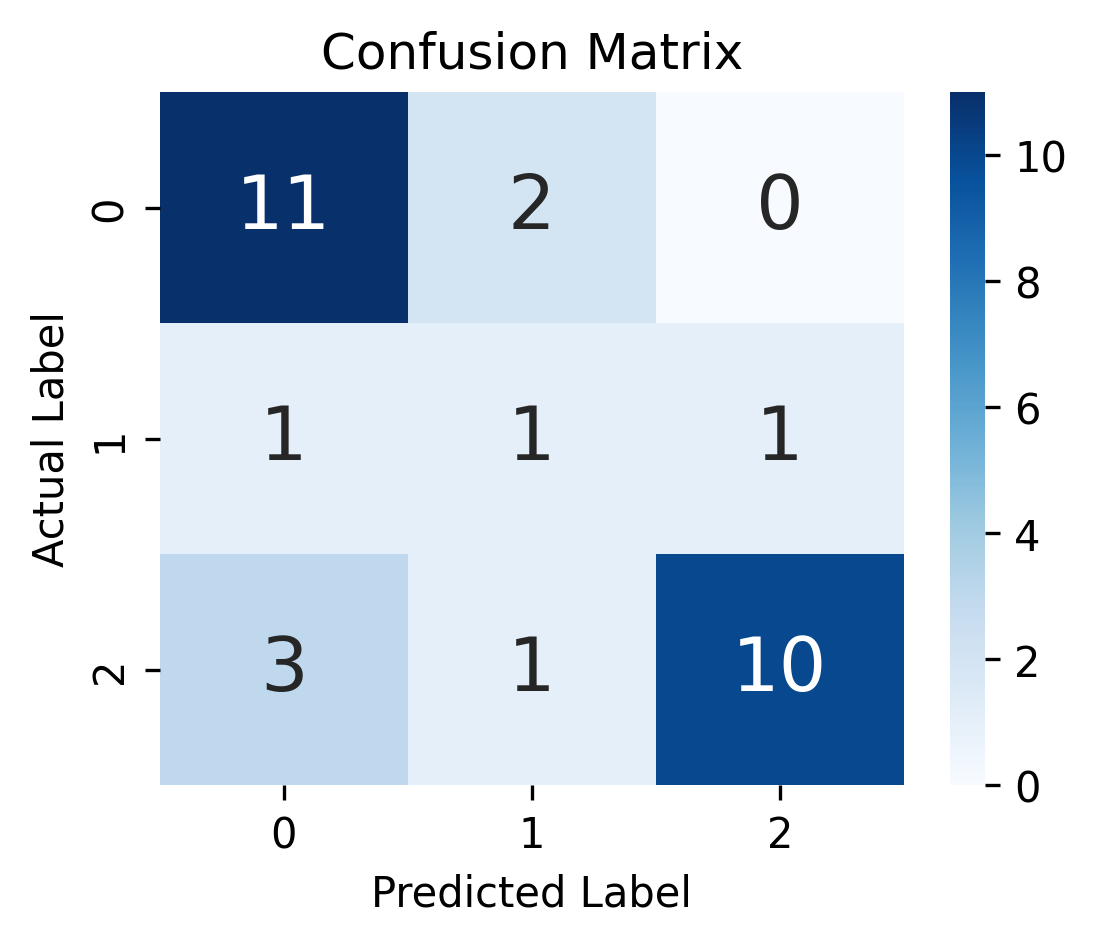

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_nb_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3), dpi=300)  # Increase figure size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 18})  # Larger annotation, blue color map

plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<img src="https://i.imgur.com/4y0k8Ey.png" width=800 />


<img src="https://i.imgur.com/1R6QsHQ.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> ROC Curve (+ ROC-AUC)**
</div>
<img src="https://i.imgur.com/C4JsH2A.png" width=800 />


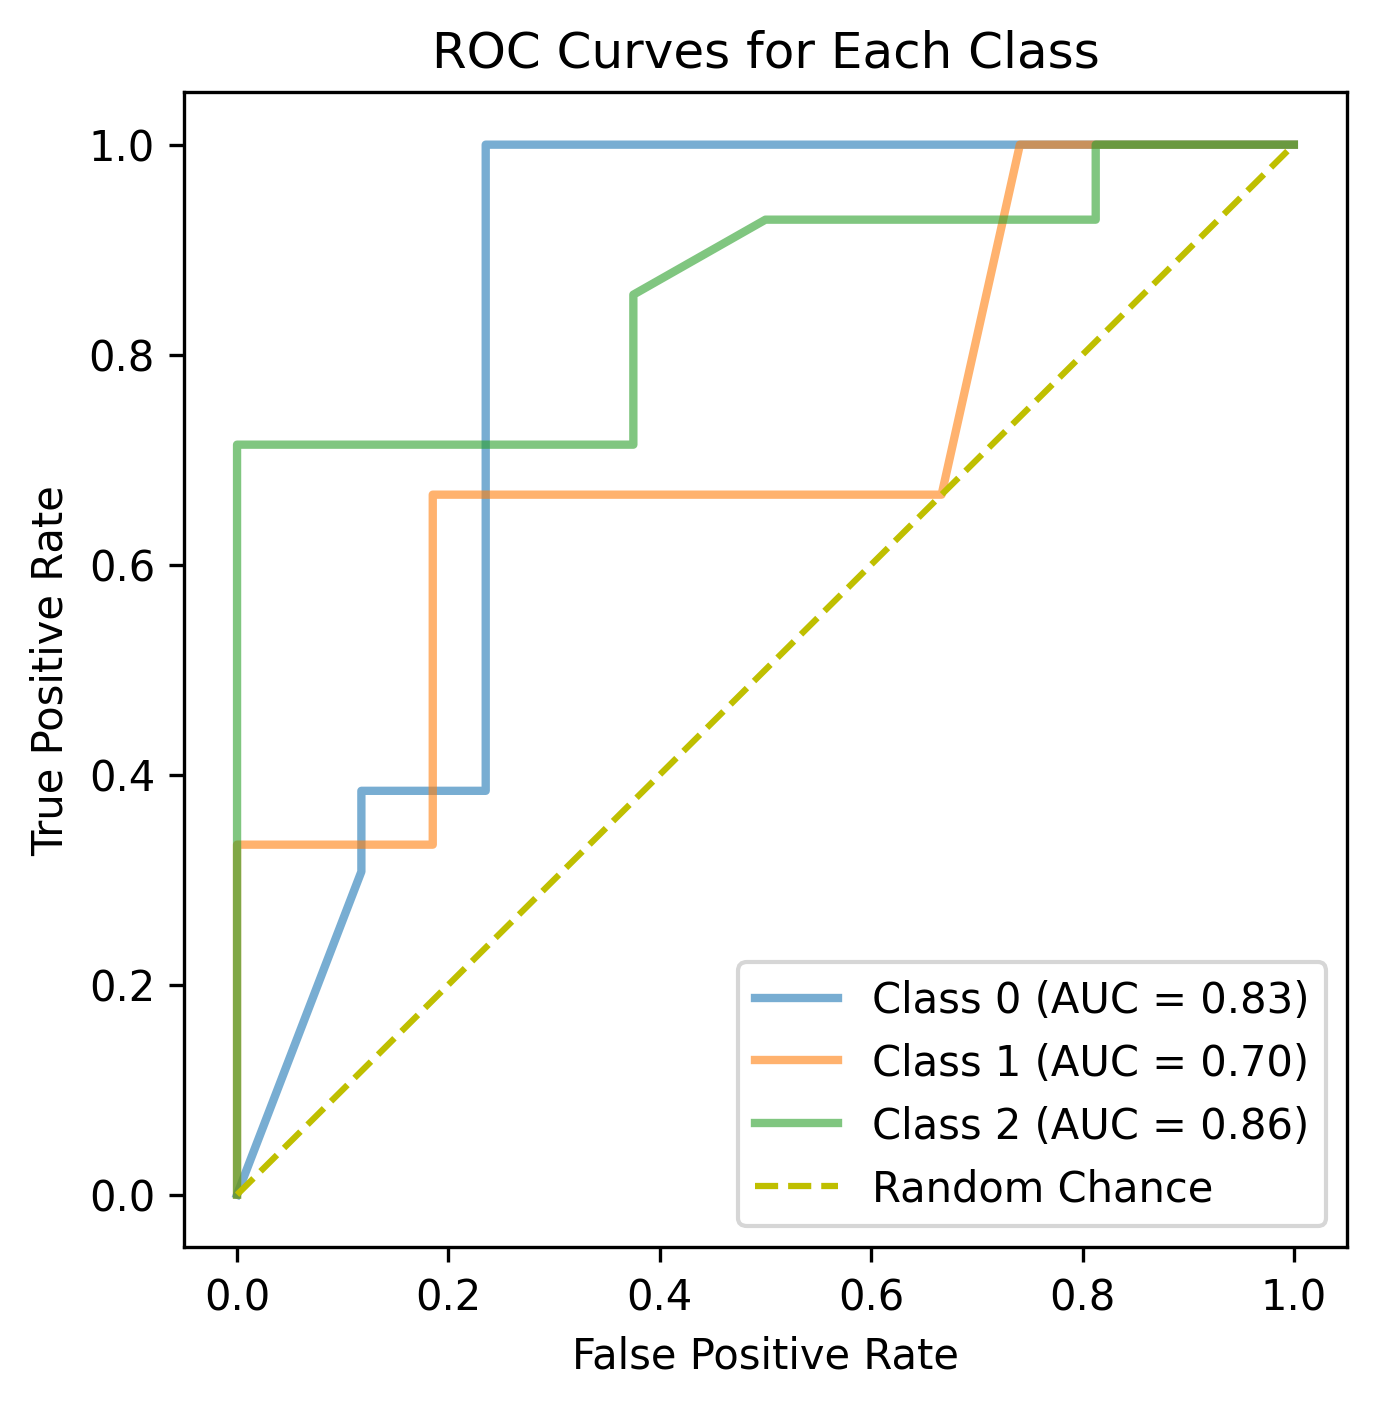

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = training_pipeline.predict_proba(X_test)

plt.figure(figsize=(5, 5), dpi=300)

for i in y_test.unique():
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.6, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'y--', label='Random Chance')
plt.title('ROC Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

<img src="https://i.imgur.com/5iaCs9o.png" width=800 />


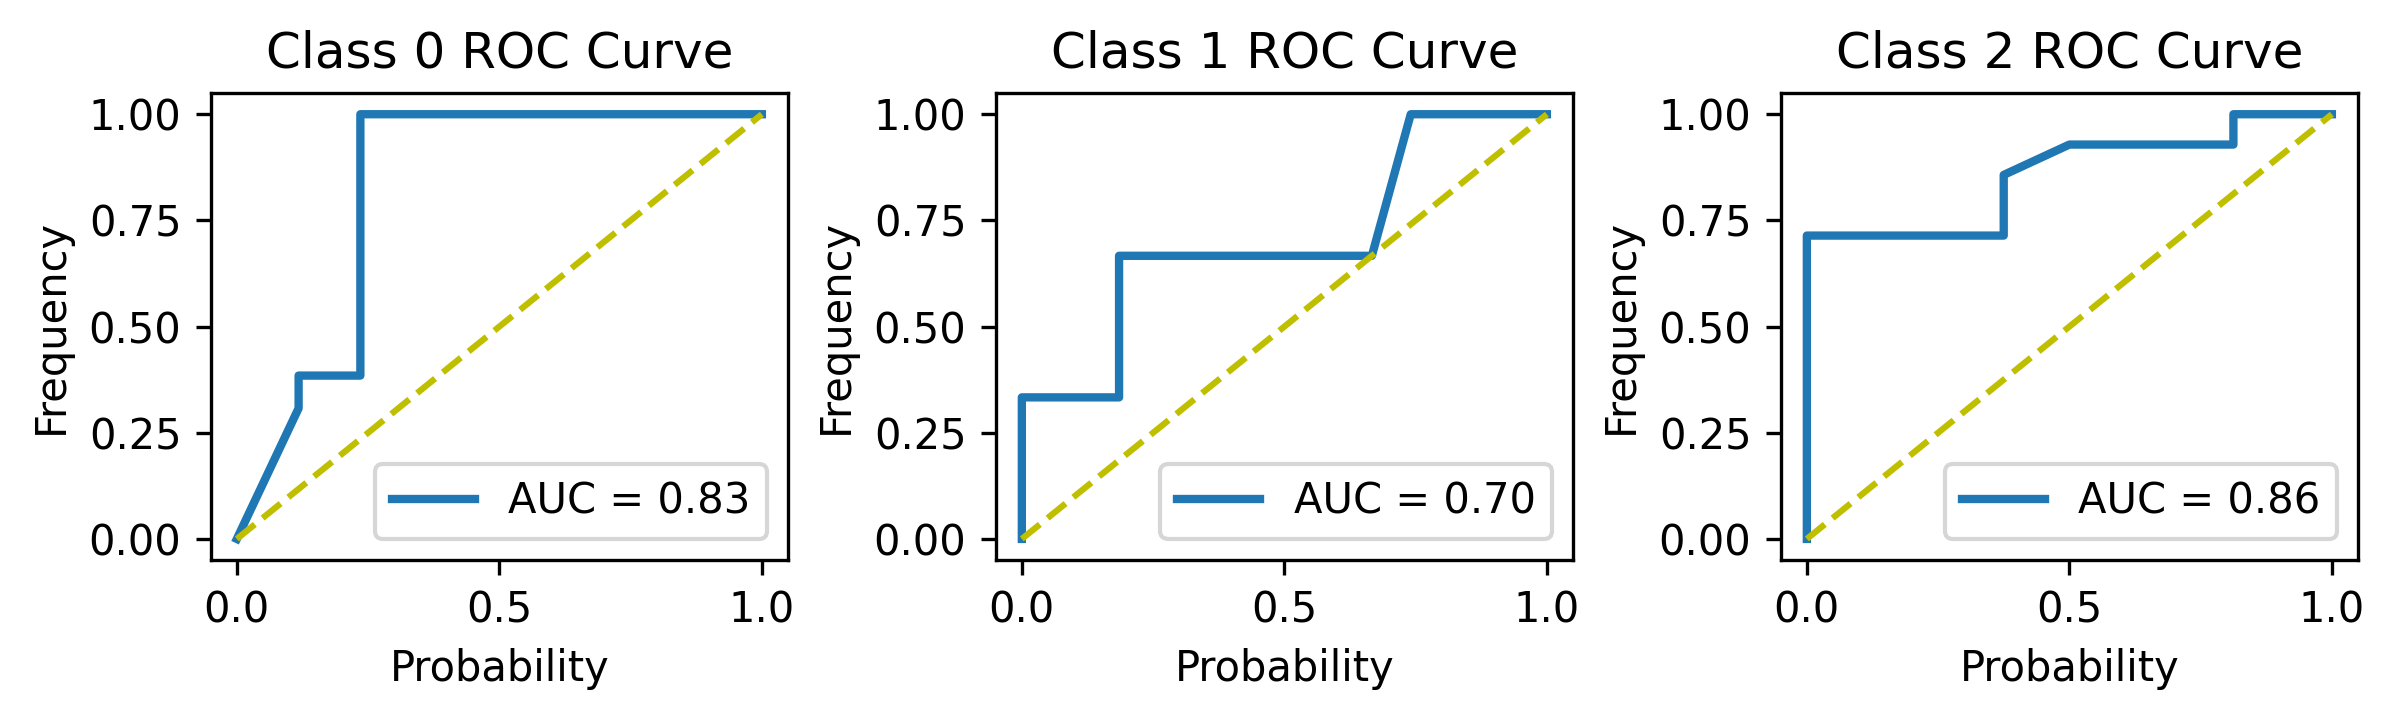

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = training_pipeline.predict_proba(X_test)
n_classes = y_test.unique()

plt.figure(figsize=(8, 2.5), dpi=300)

for i in n_classes:
    plt.subplot(1, len(n_classes), i + 1)

    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')

    plt.plot([0, 1], [0, 1], 'y--')
    plt.title(f'Class {i} ROC Curve')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### **<font color=#819A00> Class Probability Histogram**
</div>
<img src="https://i.imgur.com/WA3w79c.png" width=800 />


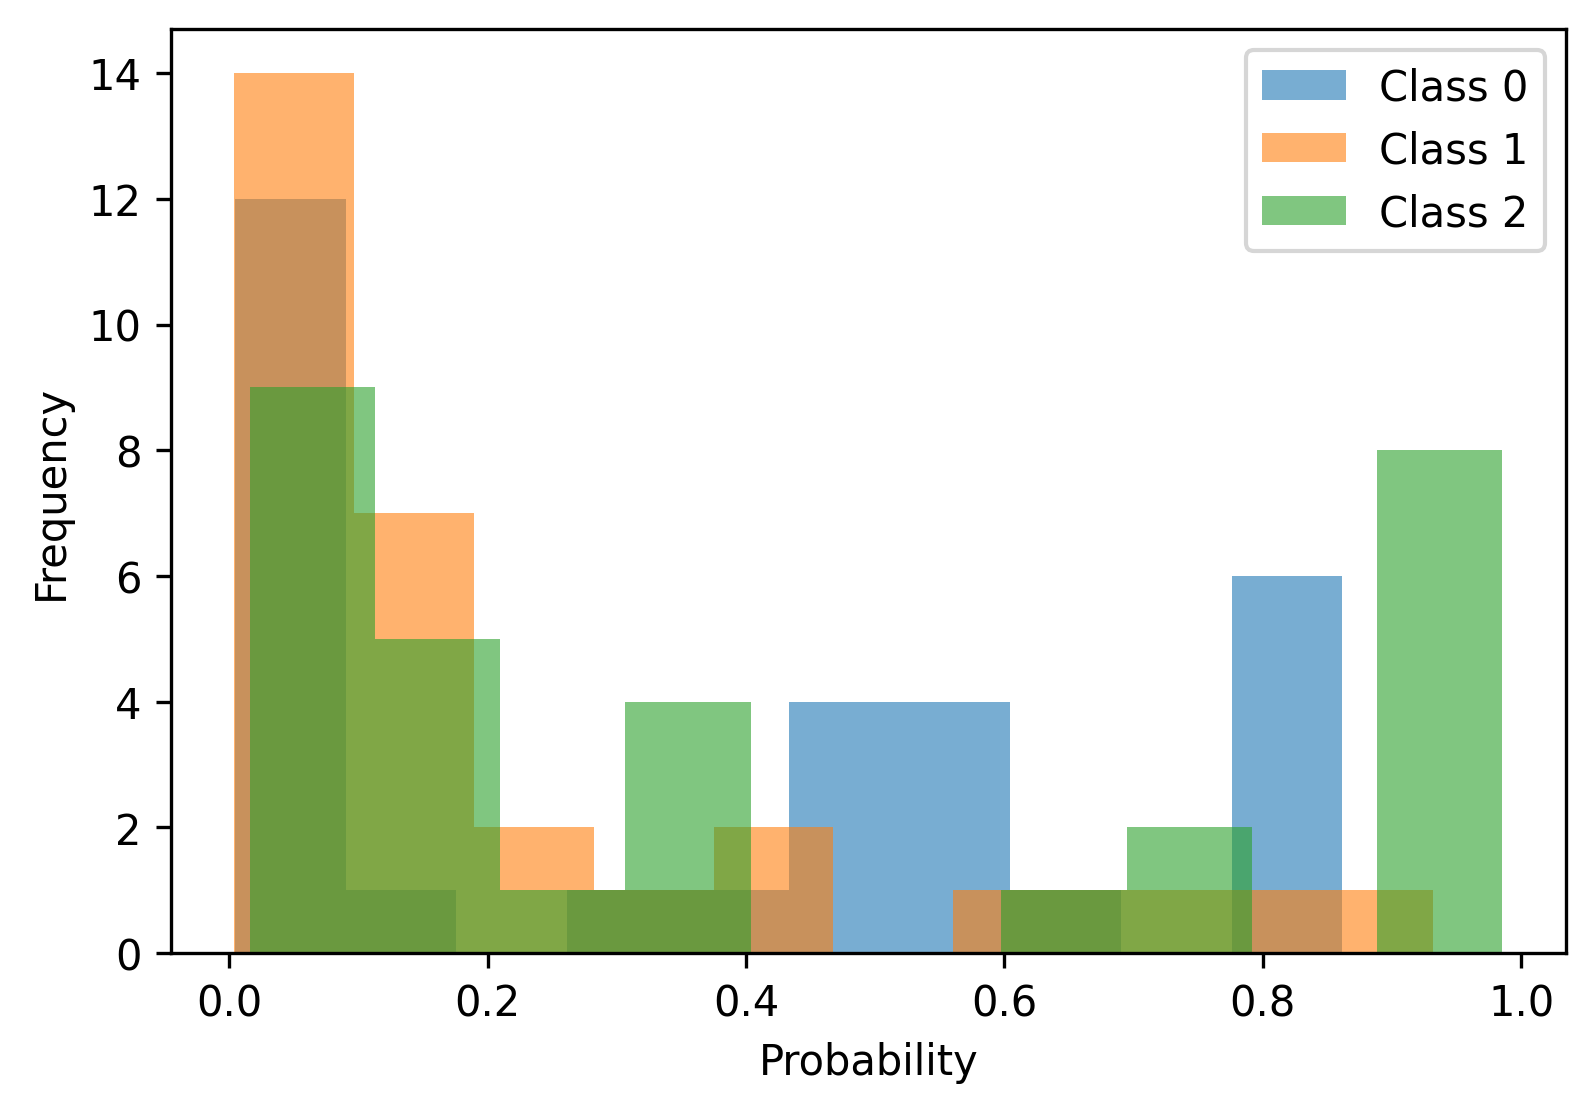

In [ ]:
import matplotlib.pyplot as plt

y_prob = training_pipeline.predict_proba(X_test)
n_classes = y_test.unique()

plt.figure(figsize=(6, 4), dpi=300)

for i in n_classes:
    plt.hist(y_prob[:, i], bins=10, alpha=0.6, label=f'Class {i}')

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc="upper right")

plt.show()

<img src="https://i.imgur.com/Nqdkhf4.png" width=800 />


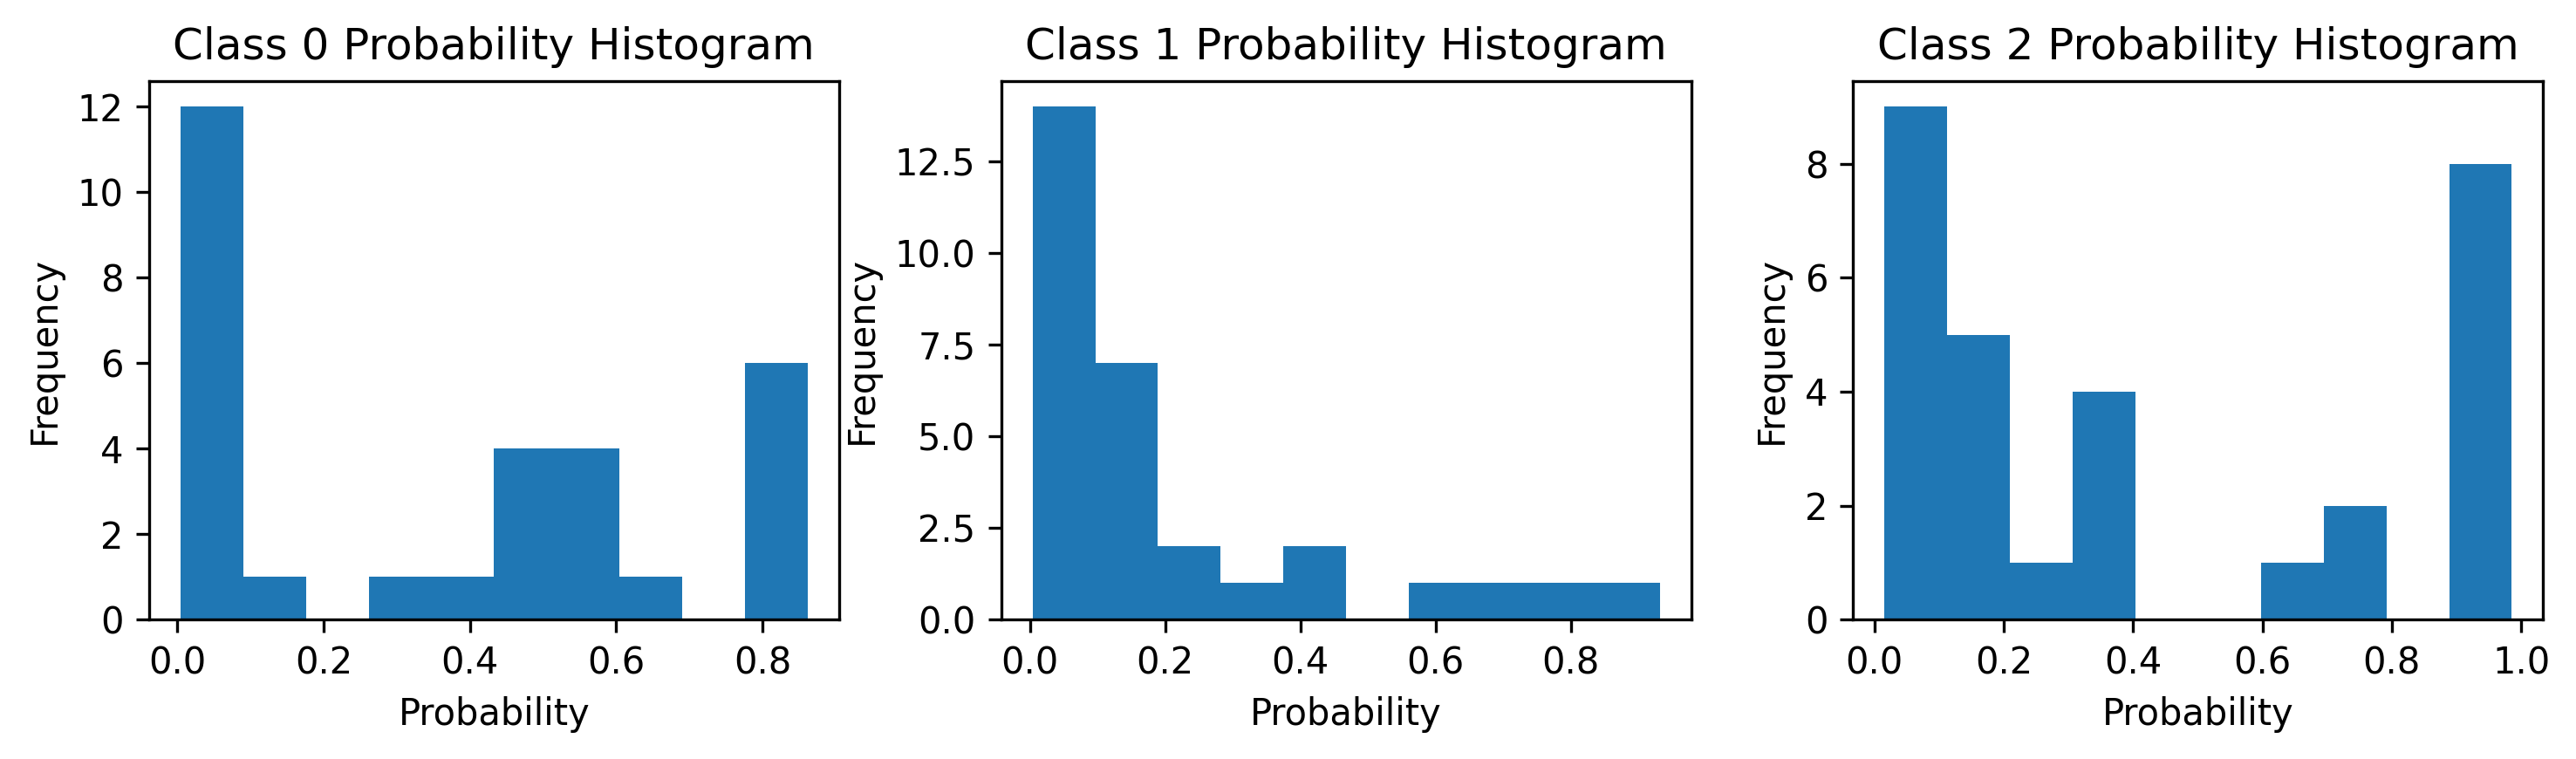

In [ ]:
import matplotlib.pyplot as plt

y_prob = training_pipeline.predict_proba(X_test)
n_classes = y_test.unique()

plt.figure(figsize=(10, 3), dpi=300)

for i in n_classes:
    plt.subplot(1, len(n_classes), i + 1)

    plt.hist(y_prob[:, i], bins=10)

    plt.title(f'Class {i} Probability Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Multiclass Classification Metrics Summarized**
</div>

Cross-Validation Accuracy: 0.667 ± 0.34
Accuracy : 0.7333333333333333
Confusion Matrix:
[[11  2  0]
 [ 1  1  1]
 [ 3  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.25      0.33      0.29         3
           2       0.91      0.71      0.80        14

    accuracy                           0.73        30
   macro avg       0.63      0.63      0.62        30
weighted avg       0.77      0.73      0.74        30



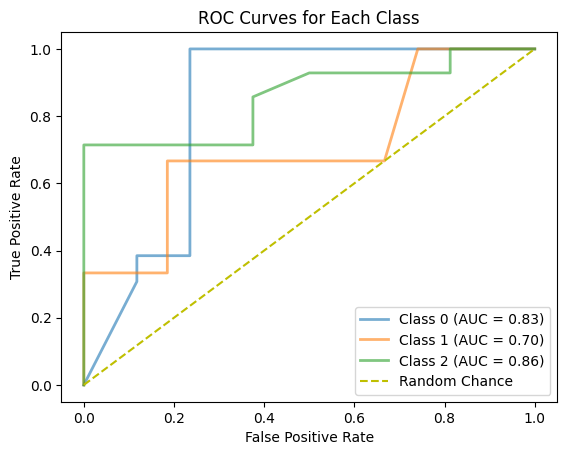

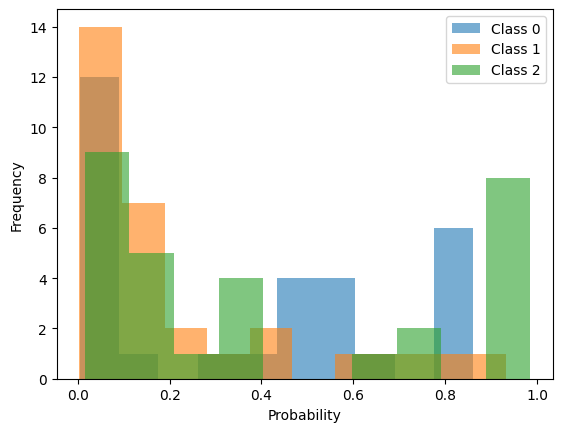

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler

from sklearn.pipeline    import make_pipeline
from sklearn.compose     import ColumnTransformer
from sklearn.metrics     import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics     import roc_curve, roc_auc_score, auc
from sklearn.metrics     import classification_report, confusion_matrix

# Import Classification Algorithm
from sklearn.multiclass  import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm         import SVC

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    BernoulliNB()
    #OneVsRestClassifier(SVC(probability=True, random_state=42))
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv,
                         scoring='accuracy'
                        #scoring='precision_macro' # 'recall_macro', 'f1_macro'
                        #scoring='precision_micro' # 'recall_micro', 'f1_micro'
                        #scoring='precision_weighted' # 'recall_weighted', 'f1_weighted'
                         )
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
y_prob = training_pipeline.predict_proba(X_test)

# EVALUATE THE MODEL
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
# print(f"Precision: {precision_score(y_test, y_pred, average='micro')}") # 'macro', 'weighted
# print(f"Recall   : {recall_score(y_test, y_pred, average='micro')}") # 'macro', 'weighted
# print(f"F1-Score : {f1_score(y_test, y_pred, average='micro')}") # 'macro', 'weighted
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# EVALUATE WITH VISUALIZATION
## ROC CURVE
for i in y_test.unique():
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.6, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'y--', label='Random Chance')
plt.title('ROC Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## CLASS PROBABILITY HISTOGRAM
for i in y_test.unique():
    plt.hist(y_prob[:, i], bins=10, alpha=0.6, label=f'Class {i}')

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc="upper right")

plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 08-4**
</div>

Get the classification report and make its class probability histogram.

Cross-Validation Accuracy: 0.942 ± 0.016
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       235
           1       0.92      0.95      0.94       369
           2       0.98      1.00      0.99        45
           3       1.00      1.00      1.00       264

    accuracy                           0.95       913
   macro avg       0.96      0.96      0.96       913
weighted avg       0.95      0.95      0.95       913



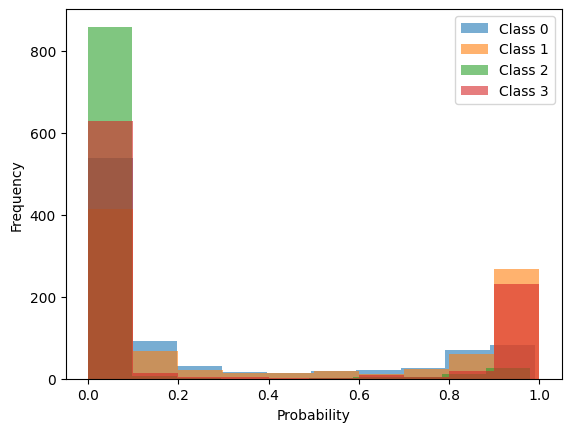

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import RandomForestClassifier

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier()
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT THE MODEL & PREDICT THE TEST SET
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
y_prob = training_pipeline.predict_proba(X_test)

# PRINT CLASSIFICATION REPORT

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# MAKE CLASS PROBABILITY HISTOGRAM
## CLASS PROBABILITY HISTOGRAM
for i in np.unique(y_test):
    plt.hist(y_prob[:, i], bins=10, alpha=0.6, label=f'Class {i}')

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc="upper right")

plt.show()


---
---

<div class='markdown-google-sans'>

## **08.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Handling Imbalanced Class**
</div>
<img src="https://i.imgur.com/j7OwaCC.png" width=800 />


<img src="https://i.imgur.com/19FYXz0.png" width=800 />


<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/QZeFQbp.png" width=800 />

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Display the transformed data with column names
columns = ['overcast', 'rain', 'sunny', 'No Wind', 'Windy',  'Temperature', 'Humidity']
print(pd.concat([pd.DataFrame(X_train_scaled, columns=columns), y_train], axis=1), '\n')
print(pd.concat([pd.DataFrame(X_test_scaled, columns=columns), y_test.reset_index(drop=True)], axis=1))

    overcast  rain  sunny  No Wind  Windy  Temperature  Humidity  Activity
0       0.00  0.00   1.00     0.00   1.00        -1.71      1.04         2
1       0.00  0.00   1.00     0.00   1.00         1.23      1.72         2
2       0.00  1.00   0.00     0.00   1.00        -0.28     -0.40         1
3       0.00  1.00   0.00     0.00   1.00        -0.67     -1.24         0
4       0.00  0.00   1.00     0.00   1.00         0.99     -0.82         2
5       0.00  0.00   1.00     0.00   1.00        -1.47      1.29         2
6       0.00  0.00   1.00     0.00   1.00         1.31      0.53         2
7       0.00  1.00   0.00     0.00   1.00        -1.47     -0.91         0
8       0.00  0.00   1.00     0.00   1.00         0.67     -0.82         2
9       1.00  0.00   0.00     0.00   1.00         0.60     -0.31         1
10      1.00  0.00   0.00     1.00   0.00        -0.67     -1.33         0
11      0.00  1.00   0.00     1.00   0.00        -0.99      1.38         0
12      1.00  0.00   0.00

<div class='markdown-google-sans'>

### **<font color=#819A00> Strategies for Handling Imbalanced Data**
</div>
<img src="https://i.imgur.com/HvtvWed.png" width=800 />

<img src="https://i.imgur.com/LK4RPIh.png" width=800 />

<img src="https://i.imgur.com/5Qwork6.png" width=800 />

<img src="https://i.imgur.com/3vZNJph.png" width=800 />


Cross-Validation Accuracy: 0.7 ± 0.326


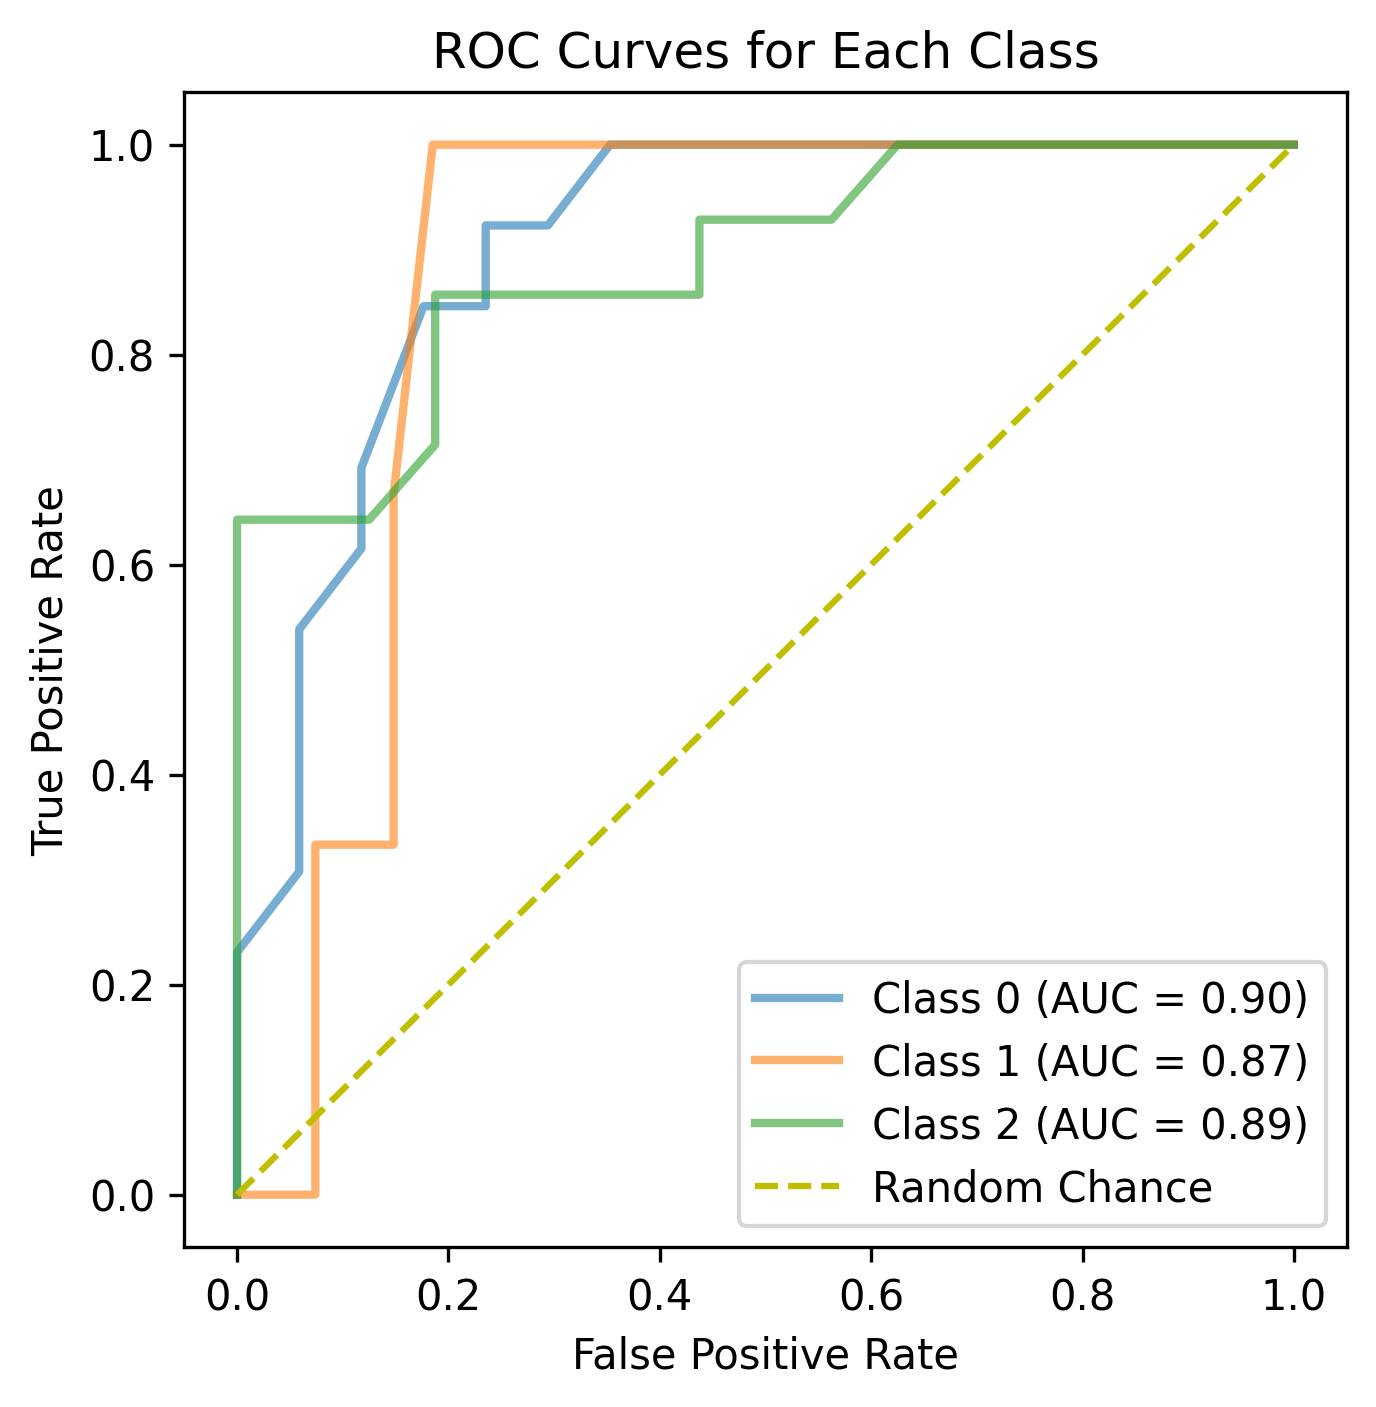

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np


# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
y_prob = training_pipeline.predict_proba(X_test)

plt.figure(figsize=(5, 5), dpi=300)

for i in y_test.unique():
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.6, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'y--', label='Random Chance')
plt.title('ROC Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

<div class='markdown-google-sans'>

### **<font color=#819A00> Resampling Techniques**
</div>
<img src="https://i.imgur.com/KUPboZk.png" width=800 />


<div class='markdown-google-sans'>

### **Oversampling Methods**
</div>
<img src="https://i.imgur.com/ygJcN39.png" width=800 />


<div class='markdown-google-sans'>

#### **Random Oversampling**
</div>
<img src="https://i.imgur.com/Vy6jfZ3.png" width=800 />


In [ ]:
# Installing the newest package
!pip install scikit-learn==1.5.0 imbalanced-learn==0.12.3

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    RandomOverSampler(),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.767 ± 0.25
Final Test Accuracy: 0.733


<div class='markdown-google-sans'>

#### **SMOTE**
</div>
<img src="https://i.imgur.com/EwnI7RS.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    SMOTE(k_neighbors=2),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.733 ± 0.34
Final Test Accuracy: 0.767


<div class='markdown-google-sans'>

#### **ADASYN**
</div>
<img src="https://i.imgur.com/0myZsdE.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    ADASYN(n_neighbors=2),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.733 ± 0.25
Final Test Accuracy: 0.767


<div class='markdown-google-sans'>

### **Undersampling Methods**
</div>
<img src="https://i.imgur.com/TyJNiIH.png" width=800 />



<div class='markdown-google-sans'>

#### **Random Undersampling**
</div>
<img src="https://i.imgur.com/AeKJ5Vo.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    RandomUnderSampler(),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.667 ± 0.34
Final Test Accuracy: 0.767


<div class='markdown-google-sans'>

#### **NearMiss**
</div>
<img src="https://i.imgur.com/cwIqghz.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    NearMiss(),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.667 ± 0.34
Final Test Accuracy: 0.767


<div class='markdown-google-sans'>

#### **ENN**
</div>
<img src="https://i.imgur.com/oQiyDbv.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    EditedNearestNeighbours(n_neighbors=2),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.7 ± 0.164
Final Test Accuracy: 0.233


<div class='markdown-google-sans'>

#### **Tomek Links**
</div>
<img src="https://i.imgur.com/esS0ezR.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    TomekLinks(),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.7 ± 0.326
Final Test Accuracy: 0.567


<div class='markdown-google-sans'>

### **Over & Under Sampling**
</div>
<img src="https://i.imgur.com/kJC9kJ0.png" width=800 />


<div class='markdown-google-sans'>

#### **SMOTEENN**
</div>
<img src="https://i.imgur.com/V6hnE2T.png" width=800 />

<img src="https://i.imgur.com/ChW2iS3.png" width=800 />


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    SMOTEENN(smote=SMOTE(k_neighbors=2),
             enn=EditedNearestNeighbours(n_neighbors=2)),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.767 ± 0.25
Final Test Accuracy: 0.800


<div class='markdown-google-sans'>

### **Sampling Mistakes**
</div>
<img src="https://i.imgur.com/INctsRt.png" width=800 />




In [ ]:
## ❌ WRONG WAY: DATA LEAKAGE##
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df = pd.get_dummies(df)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# ❌ Resampling before Splitting
smote = SMOTE()
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Initialize RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

In [ ]:
## ❌ WRONG WAY: TESTING DATA POLLUTION##

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df = pd.get_dummies(df)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# ❌ Resample the test set
smote = SMOTE(k_neighbors=2)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Initialize RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

<img src="https://i.imgur.com/Qnz0xJX.png" width=800 />

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Resampling Methods Summarized**
</div>

In [ ]:
# Installing the newest package
!pip install scikit-learn==1.4.0 imbalanced-learn==0.12.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler

#from sklearn.pipeline    import make_pipeline
from sklearn.compose     import ColumnTransformer
from sklearn.metrics     import accuracy_score

from imblearn.pipeline       import make_pipeline
from imblearn.over_sampling  import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, TomekLinks
from imblearn.combine        import SMOTEENN

# Import Classification Algorithm
from sklearn.ensemble    import RandomForestClassifier

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
   #RandomOverSampler(),
    SMOTE(k_neighbors=2),
   #ADASYN(),
   #RandomUnderSampler(),
   #EditedNearestNeighbours(n_neighbors=2),
   #TomekLinks(),
   #SMOTEEN(),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py)

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 08-5**
</div>

Resample the training data using SMOTEENN.

In [ ]:
!pip install --upgrade imblearn

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import RandomForestClassifier

from imblearn.pipeline       import make_pipeline
from imblearn.combine        import SMOTEENN

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    SMOTEENN(),
    RandomForestClassifier()
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.941 ± 0.014
Final Test Accuracy: 0.943


---
---
---

<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

The following is the dataset that you will use for this exercise. This is the same dataset and problems as the previous exercise (with one additional column).

1. **`Date`**: The date of the observation is made.

2. **`Month`**: The month of the year (obtained from `Date`)

3. **`Season`**: The season of the year.

4. **`DaytimeDuration`**: The duration of daytime
(in hour)

5. **`SunshineDuration`**: The duration of sunshine (not blocked by cloud) in a day (in hour).

6. **`Temperature`**: The average day-time temperature (in Celcius).

7. **`Humidity`**: The average day-time humidity (in %)

8. **`RainfallAmount`**: The amount of rainfall in a day (in mm)

9. **`LightningStrikes`**: The number of lightning strike happening in a day in Golf Land.

10. **`Outlook`**: The day's majority outlook (sunny, overcast, rainy, snowy)

11. **`GolfCourseCondition`**: The condition of the golf course ("Prime Time", "Fair Game", "Rough Play", "Club House Day")

In [ ]:
import pandas as pd

dataset_url = "https://www.dropbox.com/scl/fi/6jzh3f9dnnsgydq6sroa6/golf_course_conditions_with_weathers.csv?rlkey=aorsb1k76n5xhigq98rc2v608&st=vdqneyg9&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='Date')

df

,Month,Season,DaytimeDuration,SunshineDuration,Temperature,Humidity,RainfallAmount,LightningStrikes,Outlook,GolfCourseCondition
Date,,,,,,,,,,
2019-01-01,1,Winter,9.566,2.714,3.116,53.184,25.20,0,rainy,Club House Day
2019-01-02,1,Winter,9.577,7.622,5.929,50.371,0.11,0,sunny,Prime Time
2019-01-03,1,Winter,9.589,5.290,4.942,51.358,8.34,0,overcast,Rough Play
2019-01-04,1,Winter,9.601,0.984,0.995,55.305,41.23,0,rainy,Club House Day
2019-01-05,1,Winter,9.615,0.985,0.805,55.495,2.97,0,overcast,Fair Game
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,12,Winter,9.526,0.585,0.681,49.519,0.52,0,snow,Rough Play
2023-12-28,12,Winter,9.531,1.597,1.851,47.349,6.63,0,overcast,Club House Day
2023-12-29,12,Winter,9.538,0.072,2.110,46.090,0.33,0,snow,Rough Play


## 🎯 **Multiclass Classification Goal**

### Based on all the other weather conditions, can we predict whether **the condition of the golf course**?

## <font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Preparation (for all Sections)**
</div>

### Preprocessing (for all numbers)

In [ ]:
# Installing the newest package
!pip install scikit-learn==1.4.0 imbalanced-learn==0.12.3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='GolfCourseCondition'), df['GolfCourseCondition']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (20% of the Data). Use stratify=True.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state =42)

# MAKE A PREPROCESSOR (ALL USING DEFAULT VALUES)
# Mostly copy the one you made from Lesson 7 Assignment with some additions:

# OneHotEncoder(sparse=False, handle_unknown='ignore') for All Categorical Columns and 'Month'
# MinMaxScaler for 'DaytimeDuration'
# RobustScaler for 'SunshineDuration', 'LightningStrike'
# StandardScaler for 'Temperature', 'Humidity'
# KBinsDiscretizer for 'RainfallAmount'
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        # Categorical columns + 'Month' (use OneHotEncoder)
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns),

        # MinMaxScaler for 'DaytimeDuration'
        ('daytime', MinMaxScaler(), ['DaytimeDuration']),

        # RobustScaler for 'SunshineDuration', 'LightningStrikes'
        ('robust', RobustScaler(), ['SunshineDuration', 'LightningStrikes']),

        # StandardScaler for 'Temperature', 'Humidity'
        ('standard', StandardScaler(), ['Temperature', 'Humidity']),

        # KBinsDiscretizer for 'RainfallAmount'
        ('rainfall', KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform'), ['RainfallAmount'])
    ]
)




<div class='markdown-google-sans'>

## **08.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Direct Multiclass Classifiers**
</div>

Perform multiclass classification using some basic classifier. Follow the following process:

### Training

#### K Nearest Neighbor

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# CREATE A TRAINING PIPELINE WITH THE preprocessor and kNN (any parameter)
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)


# CROSS VALIDATE THE MODEL (Stratified with 5 fold)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT, PREDICT, SCORE THE MODEL
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy: 0.7849
Final Test Accuracy: 0.8033


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


#### Decision Tree

In [ ]:
# CREATE A TRAINING PIPELINE WITH THE preprocessor and Decision Tree (any parameter)
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42))
    ]
)
# CROSS VALIDATE THE MODEL (Stratified with 5 fold)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy:")
print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT, PREDICT, SCORE THE MODEL

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy:
Cross-Validation Accuracy: 0.7897
Final Test Accuracy: 0.8197


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


#### Voting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# CREATE A TRAINING PIPELINE WITH THE preprocessor and Voting Model with the following estimators:
#estimators = [('ada', AdaBoostClassifier()),
#              ('rf', RandomForestClassifier()),
#              ('gb', GradientBoostClassifier())]
voting_clf = VotingClassifier(
    estimators=[
        ('ada', AdaBoostClassifier()),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'  # Use soft voting to take predicted probabilities into account
)

# CREATE A PIPELINE WITH THE PREPROCESSOR AND VOTING CLASSIFIER
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('voting', voting_clf)
    ]
)


# CROSS VALIDATE THE MODEL (Stratified with 5 fold)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT, PREDICT, SCORE THE MODEL

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecat

Cross-Validation Accuracy: 0.8500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Final Test Accuracy: 0.8579


<div class='markdown-google-sans'>

## **08.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**One-vs-one & One-vs-Rest**
</div>

Perform multiclass classification using One-vs-one & One-vs-Rest with various classifier. Follow the following process:

### Training (One-vs-one)

#### Random Forest

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

# CREATE A RANDOM FOREST CLASSIFIER WITH One-vs-One METHOD
rf_clf = OneVsOneClassifier(RandomForestClassifier(random_state=42, n_estimators=100))

# CREATE A TRAINING PIPELINE WITH THE preprocessor and Random Forest with One-vs-one method (any parameter)
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('onevsone', rf_clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified with 5 fold)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT, PREDICT, SCORE THE MODEL

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy: 0.8473


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Final Test Accuracy: 0.8607


#### Gradient Boosting

In [ ]:
# CREATE A GRADIENT BOOSTING CLASSIFIER WITH One-vs-One METHOD
gb_clf = OneVsOneClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42))

# CREATE A PIPELINE WITH THE PREPROCESSOR AND GRADIENT BOOSTING
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('onevsone', gb_clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy: 0.8616


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Final Test Accuracy: 0.8579


### Training (One-vs-rest)

#### AdaBoost

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# CREATE AN ADABOOST CLASSIFIER WITH One-vs-Rest METHOD
ada_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators=100, random_state=42))

# CREATE A PIPELINE WITH THE PREPROCESSOR AND ADABOOST
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('onevsrest', ada_clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circ

Cross-Validation Accuracy: 0.8178


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circ

Final Test Accuracy: 0.8415


#### XGBoost

In [ ]:
from xgboost import XGBClassifier

# CREATE AN XGBOOST CLASSIFIER WITH One-vs-Rest METHOD
xgb_clf = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))

# CREATE A PIPELINE WITH THE PREPROCESSOR AND XGBOOST
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('onevsrest', xgb_clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocess

Cross-Validation Accuracy: 0.8425


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:04:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:04:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:04:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Test Accuracy: 0.8661


<div class='markdown-google-sans'>

## **08.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Handling Imbalanced Data**
</div>

Perform multiclass classification with various sampling method. Follow the following process:

### Training (No Sampling)

In [ ]:
# CREATE A TRAINING PIPELINE WITH THE preprocessor and the best model you have made in 08.2-08.3
# without additional sampling (so basically just copy paste the best pipeline you have made above as the base comparison)




# CREATE AN XGBOOST CLASSIFIER WITH One-vs-Rest METHOD
xgb_clf = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))

# CREATE A PIPELINE WITH THE PREPROCESSOR AND XGBOOST
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('onevsrest', xgb_clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:09:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:09:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:15

Cross-Validation Accuracy: 0.8425


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Test Accuracy: 0.8661


### Training (Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE  # Importing SMOTE from imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline  # To use SMOTE within a pipeline

# CREATE A RANDOM FOREST CLASSIFIER (You can choose any model)
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# CREATE A PIPELINE WITH SMOTE (Oversampling), PREPROCESSOR, AND RANDOM FOREST
pipeline = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # SMOTE for oversampling
        ('classifier', clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy: 0.8432


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Final Test Accuracy: 0.8579


### Training (Undersampling)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  # Importing RandomUnderSampler from imbalanced-learn

# CREATE A RANDOM FOREST CLASSIFIER (You can choose any model)
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# CREATE A PIPELINE WITH RANDOMUNDERSAMPLER (Undersampling), PREPROCESSOR, AND RANDOM FOREST
pipeline = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('undersample', RandomUnderSampler(random_state=42)),  # RandomUnderSampler for undersampling
        ('classifier', clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy: 0.8151


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Final Test Accuracy: 0.8060


### Training (Over-Undersampling)

In [ ]:
from imblearn.combine import SMOTEENN  # Importing SMOTEENN from imbalanced-learn

# CREATE A RANDOM FOREST CLASSIFIER (You can replace this with any model)
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# CREATE A PIPELINE WITH SMOTEENN (Oversampling + Cleaning), PREPROCESSOR, AND RANDOM FOREST
pipeline = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smoteenn', SMOTEENN(random_state=42)),  # SMOTEENN for oversampling + cleaning
        ('classifier', clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy: 0.8253


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Final Test Accuracy: 0.8415


<div class='markdown-google-sans'>

## **08.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Classification Metrics For Multiclass**
</div>

Analyze the result of the best model you have made in 08.5:

### Training

In [ ]:
# Copy-paste the best pipeline (that give the best accuracy) from 08.5 above



# CREATE AN XGBOOST CLASSIFIER WITH One-vs-Rest METHOD
xgb_clf = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))

# CREATE A PIPELINE WITH THE PREPROCESSOR AND XGBOOST
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('onevsrest', xgb_clf)
    ]
)

# CROSS VALIDATE THE MODEL (Stratified 5-fold cross-validation)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# FIT THE PIPELINE ON THE TRAINING DATA
pipeline.fit(X_train, y_train)

# PREDICT ON THE TEST SET
y_pred_test = pipeline.predict(X_test)

# SCORE THE MODEL ON THE TEST SET
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:22:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:15

Cross-Validation Accuracy: 0.8425


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Test Accuracy: 0.8661


Classification Report:
                precision    recall  f1-score   support

Club House Day       0.95      0.94      0.95       175
     Fair Game       0.78      0.73      0.76        70
    Prime Time       0.93      0.97      0.95        40
    Rough Play       0.72      0.77      0.74        81

      accuracy                           0.87       366
     macro avg       0.85      0.85      0.85       366
  weighted avg       0.87      0.87      0.87       366



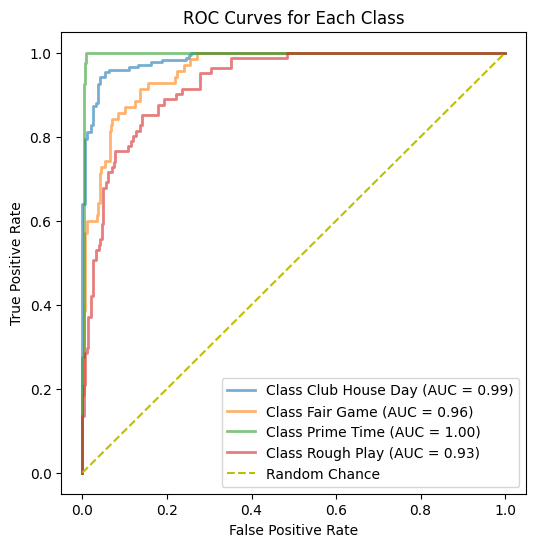

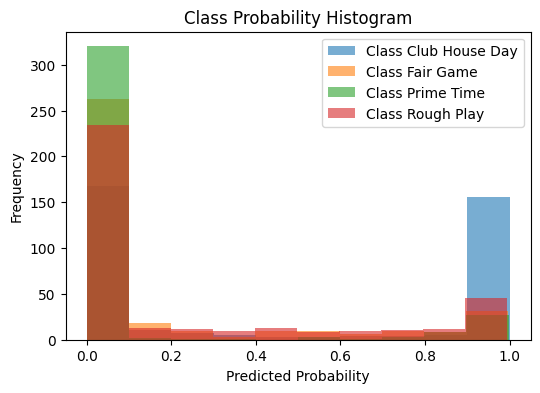

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# EVALUATE THE MODEL
print(f"Classification Report:\n{classification_report(y_test, y_pred_test)}")
y_prob = pipeline.predict_proba(X_test)

# Get the unique classes and map them to the column indices in y_prob
classes = np.unique(y_test)  # Unique class labels
class_indices = {cls: idx for idx, cls in enumerate(classes)}  # Create a mapping of class labels to indices

# EVALUATE WITH VISUALIZATION
## ROC CURVE
plt.figure(figsize=(6, 6), dpi=100)
for cls in classes:  # Loop over unique classes
    idx = class_indices[cls]  # Get the corresponding column index for the current class in y_prob
    fpr, tpr, _ = roc_curve(y_test == cls, y_prob[:, idx])  # Compute ROC curve for each class
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.6, label=f'Class {cls} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'y--', label='Random Chance')
plt.title('ROC Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## CLASS PROBABILITY HISTOGRAM
plt.figure(figsize=(6, 4), dpi=100)
for cls in classes:
    idx = class_indices[cls]  # Get the column index for the current class
    plt.hist(y_prob[:, idx], bins=10, alpha=0.6, label=f'Class {cls}')  # Plot histogram for each class

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Class Probability Histogram')
plt.legend(loc="upper right")
plt.show()